In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = pd.read_csv("./Training Data/Linear_X_Train.csv").values
y = pd.read_csv("./Training Data/Linear_Y_Train.csv").values

In [3]:
# X = (X - np.mean(X))/ np.std(X)

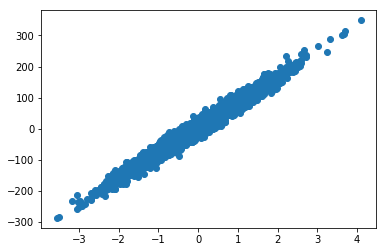

In [4]:
plt.scatter(X,y)

In [5]:
def hypothesis(x,theta):
    return theta[0]+ theta[1]*x

In [6]:
def error(X,Y,theta):
    m = X.shape[0]
    error = 0 
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
    
    return error

In [7]:
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros(2)
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += (hx -Y[i])
        grad[1] += (hx-Y[i])*X[i]
    
    return grad

In [8]:
def gradientDescent(X,Y,learning_rate = 0.0001):
    theta = np.array([-1.0,1.4])
    
    theta_list = []
    error_list = []
    
    i=0
    max_iter =50
    
    while(i<max_iter):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
    
        i+=1
    return theta, theta_list, error_list

In [9]:
theta, theta_list,error_list = gradientDescent(X,y)

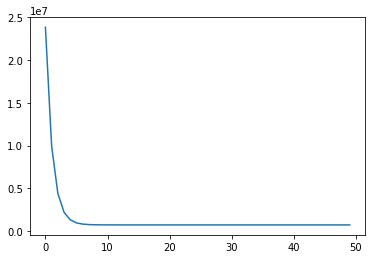

In [10]:
plt.plot(error_list)

In [11]:
T =  np.asarray(theta_list)
c, m = T[:,0], T[:,1]

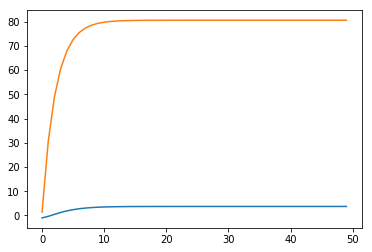

In [12]:
plt.plot(theta_list)

In [13]:
X_test = pd.read_csv("./Test Cases/Linear_X_Test.csv").values

In [14]:
y_test  = hypothesis(X_test,theta)

In [15]:
y_test.shape

(1250, 1)

In [16]:
df = pd.DataFrame(data=y_test, columns=["y"])

In [17]:
df.to_csv("y_test.csv", index=False)

In [18]:
x =  np.array(range(-4,6))

In [19]:
theta

array([ 3.72798828, 80.54363184])

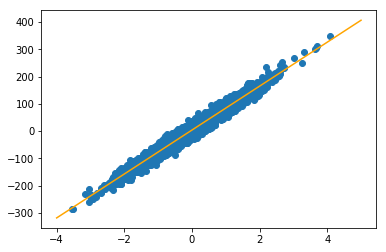

In [20]:
plt.scatter(X,y)
plt.plot(x, theta[0] + theta[1]*x , color="orange")